# Mars Images

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import math

## Load Data

In [14]:
folder_path = "calibrated"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter the list to keep only files with certain extensions (e.g., .jpg, .png)
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.png'))]

# Load images into Python
images = [Image.open(os.path.join(folder_path, file)) for file in image_files]

In [33]:
labels = pd.read_fwf('msl_synset_words-indexed.txt', sep=' ', header=None)
labels.rename(columns={0:'Label', 1:'Description'}, inplace=True)
labels

,Label,Description
0,0,apxs
1,1,apxs cal target
2,2,chemcam cal target
3,3,chemin inlet open
4,4,drill
5,5,drill holes
6,6,drt front
7,7,drt side
8,8,ground
9,9,horizon


In [40]:
test_shuffled = pd.read_fwf('test-calibrated-shuffled.txt', sep=' ', header=None)
test_shuffled.rename(columns={0:'Filename', 1:'Label'}, inplace=True)
test_shuffled['Filename'] = test_shuffled['Filename'].str[11:]
test_shuffled

,Filename,Label
0,0830MR0036510000500684E01_DRCL.JPG,7
1,0640MH0002640000203781I01_DRCL.JPG,24
2,0647MH0003250050203806E01_DRCL.JPG,9
3,0844MR0037590000501001I01_DRCL.JPG,7
4,0618MR0026460020401253I01_DRCL.JPG,11
...,...,...
1300,0571MH0002590000201894I01_DRCL.JPG,24
1301,0840ML0037090000401385I01_DRCL.JPG,17
1302,0868MH0003900000302200I01_DRCL.JPG,10
1303,0568MH0002630000201882E01_DRCL.JPG,24


In [41]:
train_shuffled = pd.read_fwf('train-calibrated-shuffled.txt', sep=' ', header=None)
train_shuffled.rename(columns={0:'Filename', 1:'Label'}, inplace=True)
train_shuffled['Filename'] = train_shuffled['Filename'].str[11:]
train_shuffled

,Filename,Label
0,0077ML0005780000102730I01_DRCL.JPG,15
1,0072MR0005610170103642E01_DRCL.JPG,8
2,0069MR0004130000103477I01_DRCL.JPG,21
3,0154ML0008510010104492E01_DRCL.JPG,8
4,0019MR0000530000100138C00_DRCL.JPG,8
...,...,...
3741,0163ML0008760050104602D01_DRCL.JPG,10
3742,0072MR0005620000103655E01_DRCL.JPG,8
3743,0066ML0003650000102517M00_DRCL.JPG,21
3744,0157ML0008550020104531I01_DRCL.JPG,8


In [42]:
val_shuffled = pd.read_fwf('val-calibrated-shuffled.txt', sep=' ', header=None)
val_shuffled.rename(columns={0:'Filename', 1:'Label'}, inplace=True)
val_shuffled['Filename'] = val_shuffled['Filename'].str[11:]
val_shuffled

,Filename,Label
0,0292MH0002810020103587C00_DRCL.JPG,5
1,0270MH0002530050102760I01_DRCL.JPG,5
2,0549MH0002620000201566E01_DRCL.JPG,24
3,0229MR0009720000202913E01_DRCL.JPG,0
4,0292MH0002810020103613C00_DRCL.JPG,5
...,...,...
1635,0486MR0011580000302944E01_DRCL.JPG,0
1636,0506MH0002240020200655I01_DRCL.JPG,8
1637,0229MR0010840000202939I01_DRCL.JPG,16
1638,0229MR0009760000202918I01_DRCL.JPG,18


In [66]:
filenames = pd.DataFrame(os.listdir('calibrated'))
filenames.rename(columns={0:'Filename'}, inplace=True)
filenames

,Filename
0,0003ML0000000110100031E01_DRCL.JPG
1,0003ML0000000110100031I01_DRCL.JPG
2,0003ML0000000120100032E01_DRCL.JPG
3,0003ML0000000120100032I01_DRCL.JPG
4,0003ML0000000130100033E01_DRCL.JPG
...,...
6732,1048MR0046080000104543I01_DRCL.JPG
6733,1059ML0046560000306154E01_DRCL.JPG
6734,1059MR0046570000104690E01_DRCL.JPG
6735,1060ML0046630000306178E01_DRCL.JPG


## Assign Labels to Images

In [68]:
df =filenames.merge(test_shuffled, how='left', on='Filename')
df =df.merge(train_shuffled, how='left', on='Filename')
df =df.merge(val_shuffled, how='left', on='Filename')
if df['Label_x'].notnull():
    df['Label'] = df['Label_x'] + df['Label_y'].fillna(0) + df['Label'].fillna(0)
elif df['Label_y'].notnull():
    df['Label'] = df['Label_x'].fillna(0) + df['Label_y'] + df['Label'].fillna(0)
elif df['Label'].notnull():
    df['Label'] = df['Label_x'].fillna(0) + df['Label_y'].fillna(0) + df['Label']
df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [59]:
# Merge the dataframes sequentially, updating the 'Label' column
df = filenames.merge(test_shuffled[['Filename', 'Label']], how='left', on='Filename')
df['Label'] = df['Label'].fillna(train_shuffled.set_index('Filename')['Label'])
df['Label'] = df['Label'].fillna(val_shuffled.set_index('Filename')['Label'])
df

,Filename,Label
0,0003ML0000000110100031E01_DRCL.JPG,NaN
1,0003ML0000000110100031I01_DRCL.JPG,NaN
2,0003ML0000000120100032E01_DRCL.JPG,NaN
3,0003ML0000000120100032I01_DRCL.JPG,NaN
4,0003ML0000000130100033E01_DRCL.JPG,NaN
...,...,...
6732,1048MR0046080000104543I01_DRCL.JPG,0.0
6733,1059ML0046560000306154E01_DRCL.JPG,4.0
6734,1059MR0046570000104690E01_DRCL.JPG,4.0
6735,1060ML0046630000306178E01_DRCL.JPG,4.0


In [65]:
df.isna().sum()

Filename       0
Label_x     5432
Label_y     2991
Label          0
dtype: int64

## Exploration

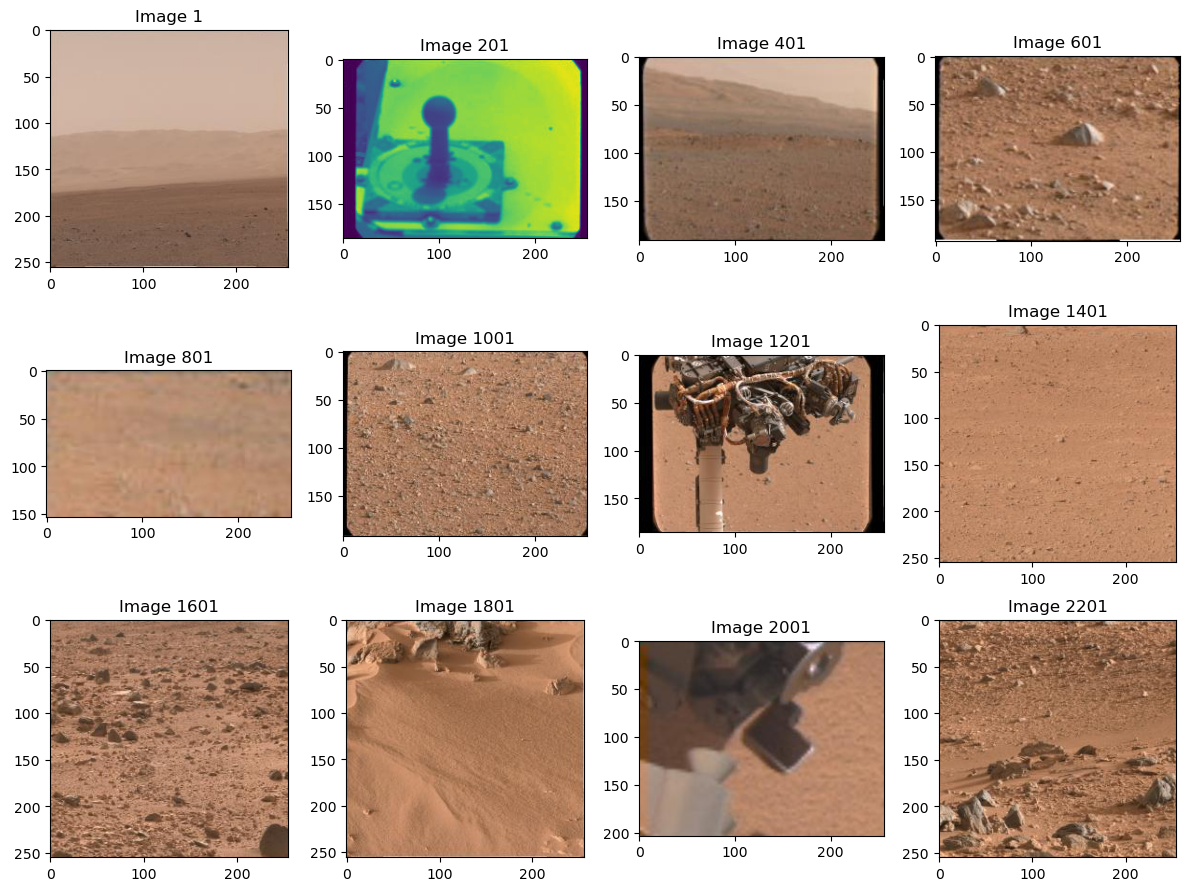

In [47]:
# Assuming 'images' is the list of PIL Image objects
num_images_to_display = 12

# Calculate the number of rows and columns for the subplot grid
num_rows = math.ceil(num_images_to_display / 4)
num_cols = min(num_images_to_display, 4)

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

# Flatten the axes array if it's more than 1D
axes = axes.flatten()

# Display the first few images in the subplots
for i in range(num_images_to_display):
    j = i*200
    if i < len(images):
        axes[i].imshow(images[j])
        axes[i].set_title(f"Image {j + 1}")

# Remove any empty subplots
for i in range(num_images_to_display, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()